In [51]:
# import pandas 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from func import *

# read the csv into a usable dataframe, clean data, create variables 
all_211 = pd.read_csv("pgh-211.csv", low_memory=False)
all_211_df = pd.DataFrame(all_211)
all_211_df["contact_date"] = pd.to_datetime(all_211_df["contact_date"], format='%Y-%m-%d')

# Where should the city of Pittsburgh focus volunteer outreach programs to help prevent hunger issues, utility shut-offs, and housing access issues?

## Overview

The goal of the analysis is to look at the [WPRDC dataset on 211 calls](https://data.wprdc.org/dataset/211-requests) within Allegheny County, Pennsylvania specifially to try to identify areas where volunteer outreach programs would make the most impact within these three categories:

1. Hunger / food scarcity 
2. Basic utility access 
3. Housing access (people without homes)

> Every day, thousands of people in our region are struggling to put food on the table, keep the lights on, and keep a roof over their head. 2-1-1 is a 24/7 telephone helpline (also available via text and chat) that helps prevent hunger, utility shut-offs and homelessness when people have nowhere else to turn. During each call, our Resource Navigators skillfully identify an individual’s immediate needs and connect them to services and resources that address the full spectrum of needs discovered through a thoughtful and compassionate conversation.



## First, we'll start with an overview of the available data

In [52]:
all_211_df.head(3)

,contact_date,gender,age_range,zip_code,county,state,needs_category,needs_code,level_1_classification,level_2_classification,needs_met
0,2020-01-01,NaN,NaN,15212,Allegheny County,Pennsylvania,Food Pantries,BD-1800.2000,Basic Needs,Food,t
1,2020-01-01,F,65 and over,15221,Allegheny County,Pennsylvania,Food Pantries,BD-1800.2000,Basic Needs,Food,t
2,2020-01-01,F,NaN,15226,Allegheny County,Pennsylvania,Food Pantries,BD-1800.2000,Basic Needs,Food,t


The combination of needs & classifications are used by 211 operators to help match callers with the outreach service they need depending on their specific problem. You can read more about the 211 request line at [this website](https://www.211.org/about-us/our-impact).

There are **1,321** categories of needs. Some examples are "Food pantries", "Soup kitchens", "Elder law", and "Smoke alarms". Needs are the top level classification and represent a category


For this analysis i'll use the `needs category` field and slice it by gender, age range, when the request was created, the zipcode of the area that the request was made from, and if the need was met and hopefully be able to answer the question - **Which areas are getting proper help with their needs and which areas might need more or better outreach programs?** Being able to identify trends in areas means that volunteer programs can proactively do outreach to help folks before they experience a pressing need. 


## How many requests are we working with?

For this analysis I only want to count requests from Allegheny County, Pennsylvania. There are **156,804** total 211 requests in the WPRDC dataset and **92,300** were made from Allegheny County, Pennsylvania. 

Going forward I just want to analyze these results so i'm going to create a new dataframe with only rows that have `county == "Allegheny County`.

In [53]:
allegheny_df = all_211_df[all_211_df["county"] == "Allegheny County"]

## What are the top 10 requests (all time)?


The top request to date is **Covid-19 Control** with a total of **14,951 requests**, but if you include the third result of **COVID-19 Immunization Clinics** the total of Covid related requests is actually **19,737**. 

Out of the total amount of top 10 requests (55,149) Covid related requests make up **~36%**. The earliest date in this dataset for a request is January 1st, 2020 so it's hard to say what the requests trends might be in a non-pandemic world, but this is something that can be looked at in the future. 

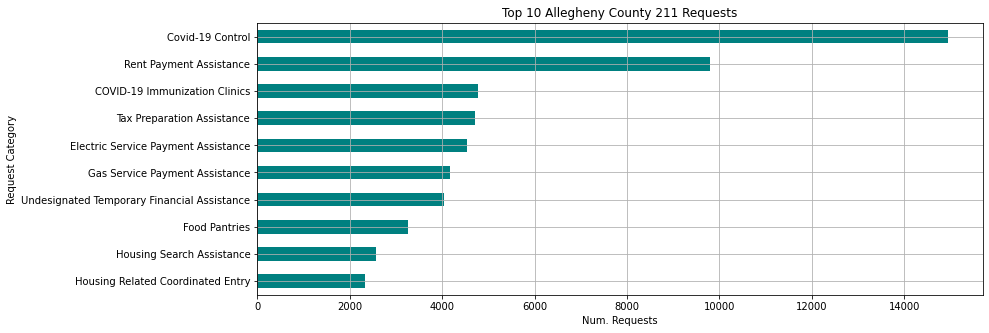

In [54]:
top_10_chart(allegheny_df)

# Requests by month

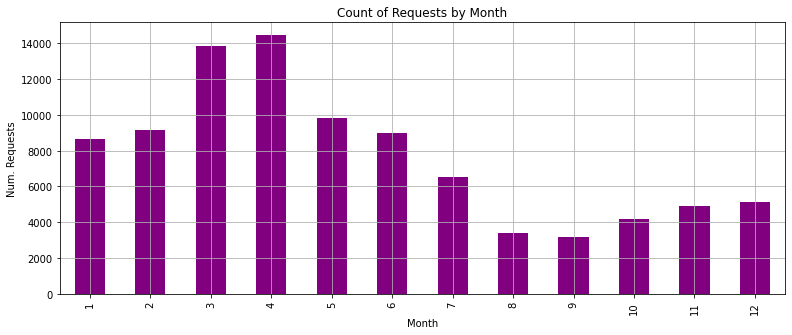

In [57]:
show_month_count_chart(allegheny_df)

Placeholder for words 

## Count of requests by zipcode 

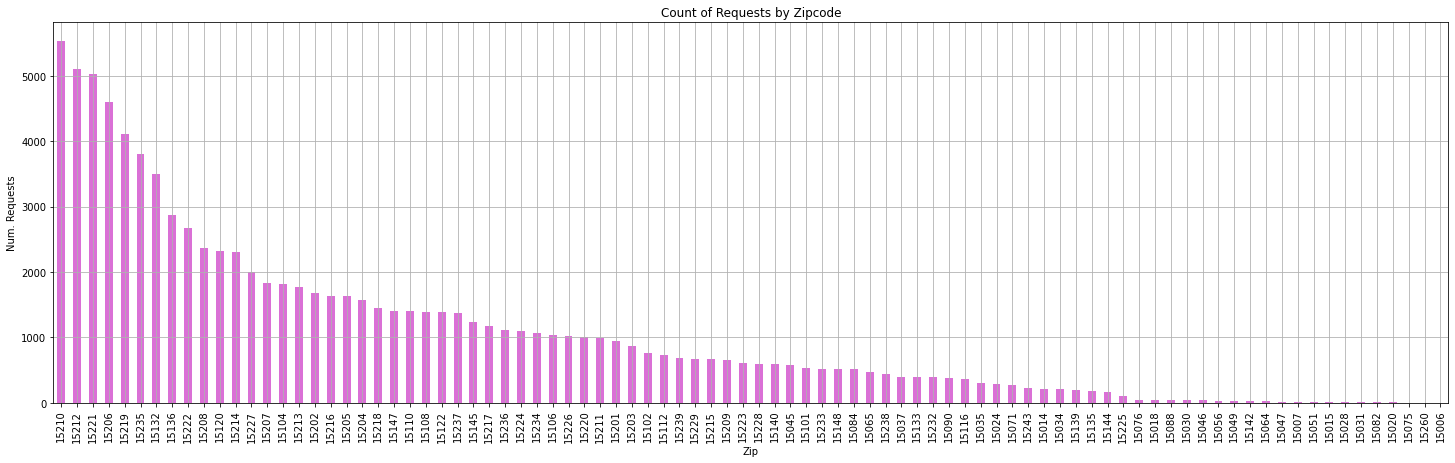

In [56]:
show_zipcode_counts(allegheny_df)

Placeholder for words

## Counts by age 

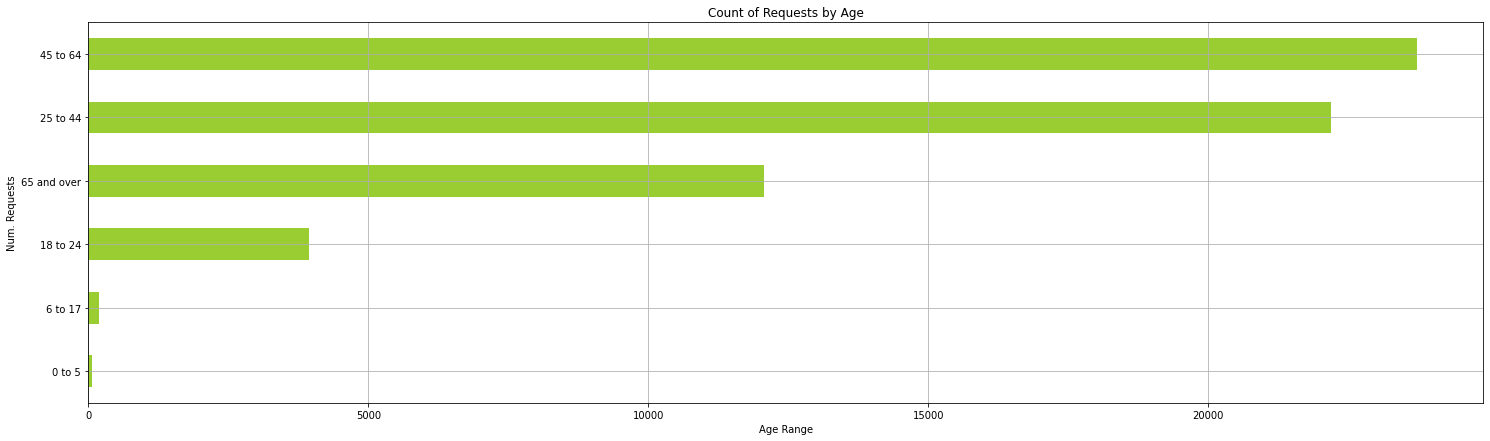

In [63]:
show_age_counts(allegheny_df)